In [35]:
%matplotlib inline

import numpy as np
import umap
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from lloyd import Field
from scipy.spatial import voronoi_plot_2d

In [2]:
embeds_dir = Path("clean_aurs_try2_01/embeds")
embeds = embeds_dir/"img_emb/img_emb_0.npy"
imgs_meta = Path("clean_aurs_try2_01/embeds/metadata/metadata_0.parquet")

In [3]:
embeds_arr = np.load(embeds)
df = pd.read_parquet(imgs_meta)
img_paths = df["image_path"].values

In [27]:
img_paths_large = []
widths = []
for i in img_paths:
    p = Image.open(i)
    widths += [p.width]
    if p.width>850:
        img_paths_large += [True]
    else:
        img_paths_large += [False]
        
img_paths_large = np.array(img_paths_large)

In [29]:
embeds_big = embeds_arr[img_paths_large]
paths_big = img_paths[img_paths_large]

In [30]:
fit = umap.UMAP()
u = fit.fit_transform(embeds_big)
u.shape

(1011, 2)

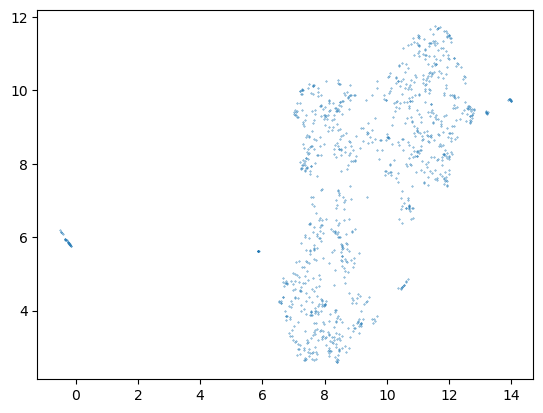

In [31]:
plt.scatter(u[:,0], u[:,1], s=0.1)

In [32]:
u_mask = np.ma.masked_inside(u[:,0],6.4,12.7).mask

In [33]:
u_c = u[u_mask,:]

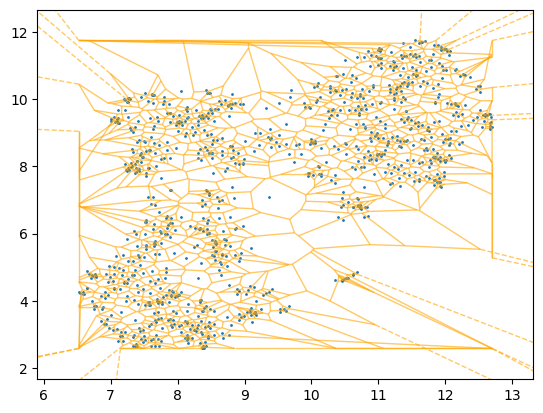

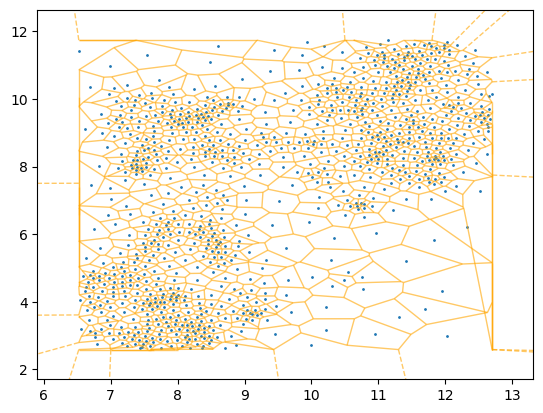

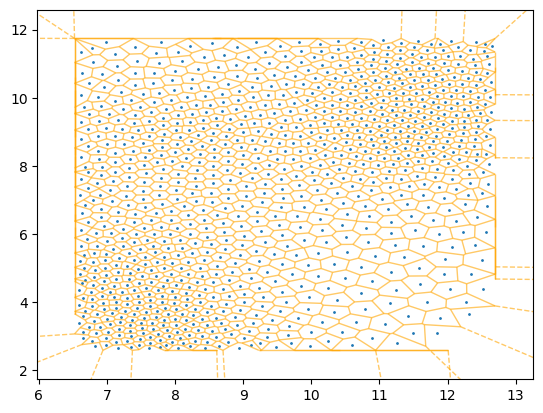

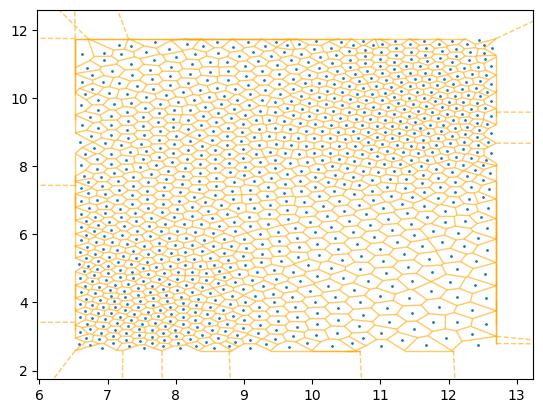

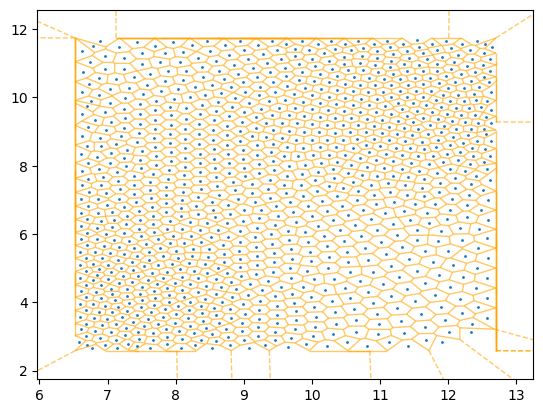

In [36]:
# build a model we can use to run lloyd relaxation on the data points
field = Field(u_c)

# plot the initial voronoi map
voronoi_plot_2d(field.voronoi, show_vertices=False, line_colors='orange', line_alpha=0.6, point_size=2)

# run lloyd relaxation several times and plot the result of each iteration
for i in range(200):
  
    # the .relax() method performs lloyd relaxation, which spaces the points apart
    field.relax()
    
    if i % 50 == 1:
        # plot the updated points and voronoi map
        p = voronoi_plot_2d(field.voronoi, show_vertices=False, line_colors='orange', line_alpha=0.6, point_size=2)

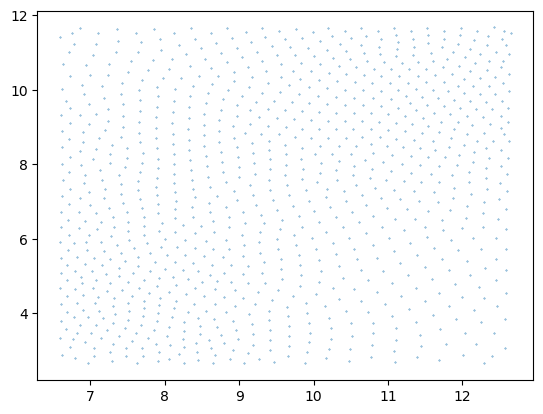

In [39]:
u_r = field.points
plt.scatter(u_r[:,0], u_r[:,1], s=0.1)

In [40]:
dists = np.sqrt(np.sum((u_c - u_r)**2, axis=1))

In [46]:
len(dists)

951

(array([222., 256., 157.,  90.,  62.,  46.,  31.,  18.,  11.,  10.,  11.,
          8.,   4.,   4.,   3.,   4.,   2.,   0.,   1.,   2.,   2.,   0.,
          0.,   1.,   0.,   0.,   2.,   1.,   1.,   2.]),
 array([0.00860766, 0.26838374, 0.52815981, 0.78793589, 1.04771196,
        1.30748804, 1.56726411, 1.82704019, 2.08681626, 2.34659234,
        2.60636841, 2.86614449, 3.12592057, 3.38569664, 3.64547272,
        3.90524879, 4.16502487, 4.42480094, 4.68457702, 4.94435309,
        5.20412917, 5.46390524, 5.72368132, 5.98345739, 6.24323347,
        6.50300954, 6.76278562, 7.02256169, 7.28233777, 7.54211384,
        7.80188992]),
 <BarContainer object of 30 artists>)

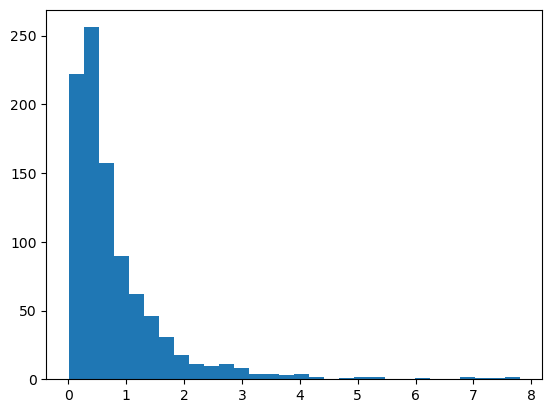

In [41]:
plt.hist(dists, bins=30)

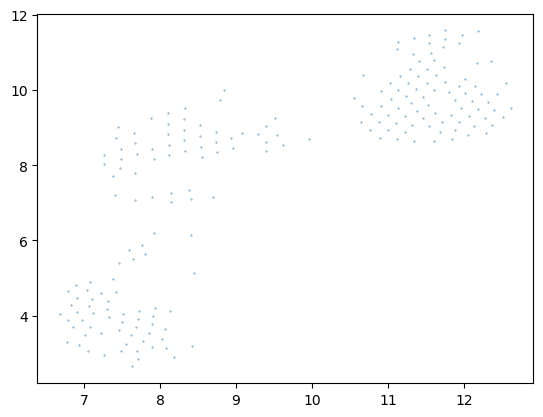

In [42]:
u_r_centers = u_r[dists<=0.25,:]
plt.scatter(u_r_centers[:,0], u_r_centers[:,1], s=0.1)

In [43]:
len(u_r_centers)

199

In [48]:
img_paths_c.shape

(951,)

In [49]:
img_paths_c = paths_big[u_mask]
img_paths_cr = img_paths_c[dists<=0.25]

In [50]:
len(img_paths_cr)

199

In [59]:
img_paths_cr[1].split("/")[-1]

'02685525-f862-48b1-805d-de285f076c99.jpg'

In [51]:
import shutil
imgs_in = Path("clean_aurs_try2_01")
imgs_out = Path("clean_aurs_try3_02")
imgs_out.mkdir(exist_ok=True)
for i in img_paths_cr:
    fname = i.split("/")[-1]
    shutil.copy(imgs_in/fname, imgs_out/fname, )